In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('top_10000_1960-JCSM1.csv')

In [6]:
data.head()

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Disc Number,Track Number,Track Duration (ms),Explicit,Popularity,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,1992-08-03,1,3,216270,False,0,...,1.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,2009-10-23,1,3,237120,False,64,...,1.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,1999-01-12,1,6,312533,False,56,...,1.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,Jive,P (P) 1999 Zomba Recording LLC
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,2014-10-20,1,11,233400,False,42,...,1.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,The Rolling Stones,1969-12-05,1,9,448720,False,0,...,1.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Track Name            9998 non-null   object        
 1   Artist Name(s)        9998 non-null   object        
 2   Album Name            9998 non-null   object        
 3   Album Artist Name(s)  9997 non-null   object        
 4   Album Release Date    9997 non-null   object        
 5   Disc Number           9999 non-null   int64         
 6   Track Number          9999 non-null   int64         
 7   Track Duration (ms)   9999 non-null   int64         
 8   Explicit              9999 non-null   bool          
 9   Popularity            9999 non-null   int64         
 10  ISRC                  9996 non-null   object        
 11  Added By              9999 non-null   object        
 12  Added At              9999 non-null   object        
 13  Artist Genres     

In [12]:
data['Album Release Date']=pd.to_datetime(data['Album Release Date'], errors='coerce')

In [13]:
data['Year']=data['Album Release Date'].dt.year

In [14]:
data.head()

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Disc Number,Track Number,Track Duration (ms),Explicit,Popularity,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights,Year
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,1992-08-03,1,3,216270,False,0,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic...",1992.0
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,2009-10-23,1,3,237120,False,64,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son...",2009.0
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,1999-01-12,1,6,312533,False,56,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,Jive,P (P) 1999 Zomba Recording LLC,1999.0
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,2014-10-20,1,11,233400,False,42,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C...",2014.0
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,The Rolling Stones,1969-12-05,1,9,448720,False,0,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ...",1969.0


In [15]:
data.to_csv('top_10000_1960-JCSM2.csv', index=False)

<Axes: >

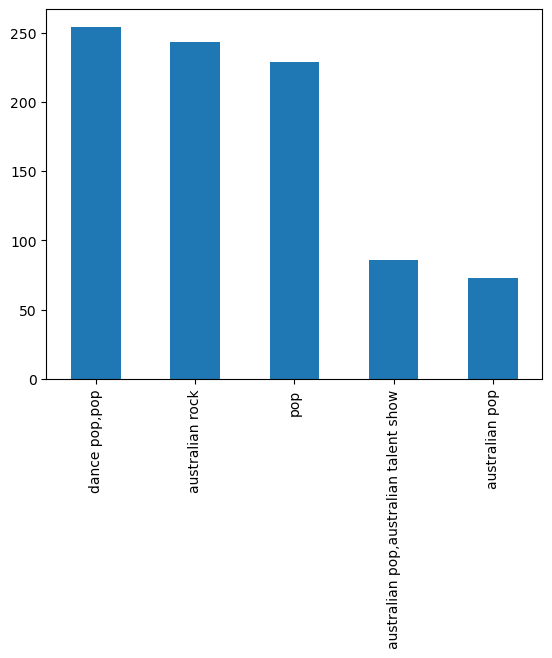

In [17]:
data['Artist Genres'].value_counts().head().plot(kind='bar')

<Axes: ylabel='Artist Genres'>

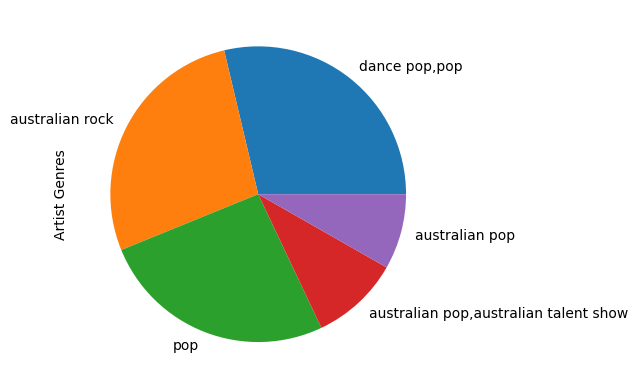

In [18]:
data['Artist Genres'].value_counts().head().plot(kind='pie')

In [45]:
data['Explicit'].value_counts()

False    9490
True      509
Name: Explicit, dtype: int64

In [47]:
data['Label'].value_counts()

Universal Music Group                  840
Columbia                               454
RCA Records Label                      302
Sony Music Entertainment               282
Universal Music Australia Pty. Ltd.    275
                                      ... 
O.L.D Ltd                                1
Red Bow Records                          1
:):                                      1
601 Music                                1
Musical Freedom                          1
Name: Label, Length: 1465, dtype: int64

                  Danceability  Loudness  Popularity      Year  Acousticness  \
Danceability          1.000000  0.091406    0.057455  0.139126     -0.199093   
Loudness              0.091406  1.000000    0.032682  0.431493     -0.450220   
Popularity            0.057455  0.032682    1.000000 -0.075894     -0.027351   
Year                  0.139126  0.431493   -0.075894  1.000000     -0.176414   
Acousticness         -0.199093 -0.450220   -0.027351 -0.176414      1.000000   
Instrumentalness      0.015057 -0.098257   -0.041387 -0.046367     -0.027924   
Valence               0.445885  0.012187   -0.004715 -0.200240     -0.132078   
Tempo                -0.174794  0.096352   -0.008705  0.007648     -0.112667   
Mode                 -0.130655 -0.118138   -0.012526 -0.124698      0.136965   
Speechiness           0.138457  0.143982    0.020008  0.156091     -0.098982   
Key                   0.000475  0.018062    0.012783  0.017400     -0.017316   

                  Instrumentalness   Va

<Axes: >

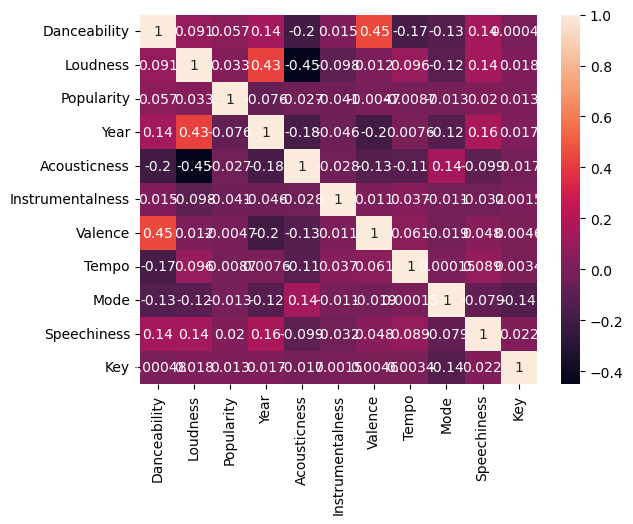

In [43]:
corr=data[['Danceability', 'Loudness', 'Popularity', 'Year', 'Acousticness', 'Instrumentalness', 'Valence', 'Tempo', 'Mode', 'Speechiness', 'Key']].corr()
print(corr)
sns.heatmap(corr, annot=True)

              Loudness  Popularity      Year    Energy       Key  \
Loudness      1.000000    0.032682  0.431493  0.678353  0.018062   
Popularity    0.032682    1.000000 -0.075894  0.006287  0.012783   
Year          0.431493   -0.075894  1.000000  0.154665  0.017400   
Energy        0.678353    0.006287  0.154665  1.000000  0.033854   
Key           0.018062    0.012783  0.017400  0.033854  1.000000   
Danceability  0.091406    0.057455  0.139126  0.134561  0.000475   
Acousticness -0.450220   -0.027351 -0.176414 -0.627445 -0.017316   

              Danceability  Acousticness  
Loudness          0.091406     -0.450220  
Popularity        0.057455     -0.027351  
Year              0.139126     -0.176414  
Energy            0.134561     -0.627445  
Key               0.000475     -0.017316  
Danceability      1.000000     -0.199093  
Acousticness     -0.199093      1.000000  


<Axes: >

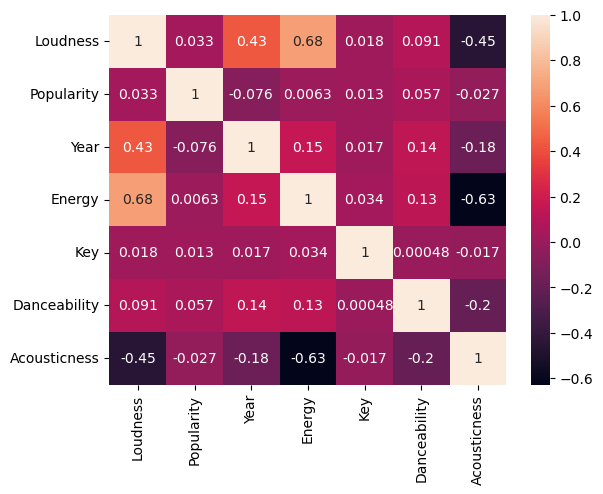

In [44]:
corr=data[['Loudness', 'Popularity', 'Year', 'Energy', 'Key', 'Danceability', 'Acousticness']].corr()
print(corr)
sns.heatmap(corr, annot=True)

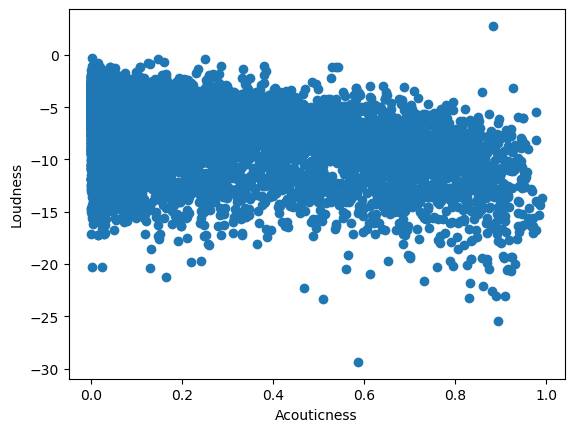

In [49]:
plt.scatter(data['Acousticness'], data['Loudness'])
plt.xlabel("Acouticness")
plt.ylabel("Loudness")
plt.show()

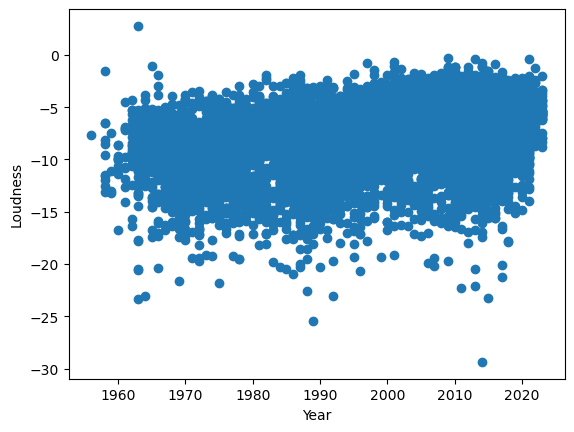

In [51]:
plt.scatter(data['Year'], data['Loudness'])
plt.xlabel("Year")
plt.ylabel("Loudness")
plt.show()

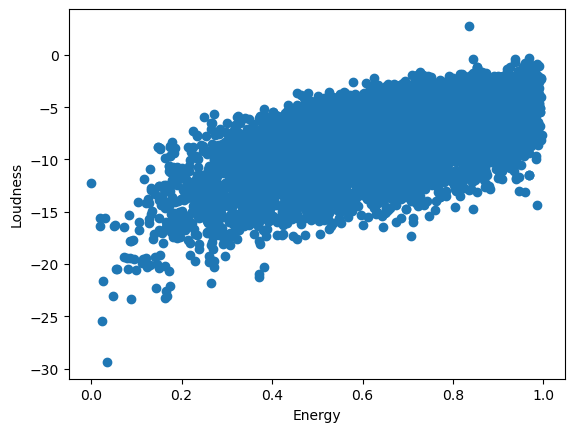

In [52]:
plt.scatter(data['Energy'], data['Loudness'])
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

In [59]:
data[['Danceability','Loudness','Popularity','Year','Acousticness','Instrumentalness','Valence','Tempo','Mode','Speechiness','Key']].describe()

,Danceability,Loudness,Popularity,Year,Acousticness,Instrumentalness,Valence,Tempo,Mode,Speechiness,Key
count,9997.000000,9997.000000,9999.000000,9996.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,0.607925,-7.269217,37.624662,2001.821729,0.208589,0.029331,0.585459,121.496650,0.698410,0.065138,5.167750
std,0.145869,3.281731,29.460808,15.216097,0.248842,0.123576,0.239105,26.260686,0.458971,0.061324,3.578392
min,0.000000,-29.368000,0.000000,1956.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.515000,-9.070000,0.000000,1993.000000,0.018400,0.000000,0.398000,102.642000,0.000000,0.033100,2.000000
50%,0.617000,-6.518000,42.000000,2007.000000,0.095600,0.000006,0.598000,120.653000,1.000000,0.042900,5.000000
75%,0.710000,-4.887000,64.000000,2014.000000,0.318000,0.000561,0.783000,134.328000,1.000000,0.067500,8.000000
max,0.988000,2.769000,98.000000,2023.000000,0.991000,0.985000,0.995000,217.913000,1.000000,0.711000,11.000000


In [60]:
data[['Year', 'Track Number', 'Track Duration (ms)', 'Disc Number', 'Energy']].describe()

,Year,Track Number,Track Duration (ms),Disc Number,Energy
count,9996.000000,9999.000000,9.999000e+03,9999.000000,9997.000000
mean,2001.821729,4.957096,2.248150e+05,1.035104,0.683281
std,15.216097,5.502810,5.410012e+04,0.327856,0.191131
min,1956.000000,0.000000,0.000000e+00,0.000000,0.000020
25%,1993.000000,1.000000,1.925795e+05,1.000000,0.560000
50%,2007.000000,3.000000,2.199060e+05,1.000000,0.712000
75%,2014.000000,7.000000,2.502600e+05,1.000000,0.835000
max,2023.000000,93.000000,1.561133e+06,15.000000,0.997000
